# _Genesis Paul's Project Proposal_

## Summary
> The purpose of minimum wage is to preserve livability for the lowest paid working class. The federal minimum wage is currently set at $7.25. There is much debate on whether or not the minimum wage should be increased and for that reason I will be doing my analysis on both state and federal minimum wage.

## Data
This proposal requires 2 data sources. I will be using both quantitative & qualititive sources at this time:

Qualititative: [Kaggle Data Set](https://www.kaggle.com/lislejoem/us-minimum-wage-by-state-from-1968-to-2017) on State Minimum Wage from 1968 to 2020. I will only be Using data from 200 - 2020

Quantitive: [State Compared to Federal](https://www.debt.org/jobs/minimum-wage/)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Minimum Wage Data.csv") #CSV was downloaded into jupyter, rather than using the web link to kaggle provided above
data

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c]
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN


#### Format Data

In [3]:
data2 = data.set_index(['Year','State']) # My primary focus will be to compare the years
                                         # Therefore, state data will primarily be used to calculate annual statistics
                                         # and which state the minimum wage comes from essentially won't matter for a large portion of my analysis
#Only using State Min Wage, Fed Min Wage, Effective Min Wage, & CPI Average for Analysis
data3 = data2[['State.Minimum.Wage', 
               'Federal.Minimum.Wage', 
               'Effective.Minimum.Wage', 
               'CPI.Average']]
#Rename columns
data4 = data3.rename(columns = {"State.Minimum.Wage": "State Minimum Wage", 
               "Federal.Minimum.Wage": "Federal Minimum Wage", 
               "Effective.Minimum.Wage": "Effective Minimum Wage", 
               "CPI.Average": "CPI Average"})
data4

State Minimum Wage  Federal Minimum Wage  \
Year State                                                     
1968 Alabama                   0.00000                  1.15   
     Alaska                    2.10000                  1.15   
     Arizona                   0.46800                  1.15   
     Arkansas                  0.15625                  1.15   
     California                1.65000                  1.15   
...                                ...                   ...   
2020 Virginia                  7.25000                  7.25   
     Washington               13.50000                  7.25   
     West Virginia             8.75000                  7.25   
     Wisconsin                 7.25000                  7.25   
     Wyoming                   5.15000                  7.25   

                    Effective Minimum Wage  CPI Average  
Year State                                               
1968 Alabama                          1.15        34.80  
     Alaska                           2.10        34.80  
     Arizona                          1.15        34.80  
     Arkansas                         1.15        34.80  
     California                       1.65        34.80  
...                                    ...          ...  
2020 Virginia                         7.25       258.66  
     Washington                      13.50       258.66  
     West Virginia                    8.75       258.66  
     Wisconsin                        7.25       258.66  
     Wyoming                          7.25       258.66  

[2862 rows x 4 columns]

## Standard Analysis

> After reviewing the formatted data (data 4) I recognized that the trend of leaving federal minimum wage the same for long periods of time, until the average state minimum wage catches up, persists. 

> For this reason, I will be condensing the data to only use 1990 - 2020 data, as I believe it will still provide an accurate historical representation:

In [4]:
minWage = data4.loc[1990:2020]
minWage

State Minimum Wage  Federal Minimum Wage  \
Year State                                                     
1990 Alabama                      0.00                  3.35   
     Alaska                       3.85                  3.35   
     Arizona                      0.00                  3.35   
     Arkansas                     3.25                  3.35   
     California                   3.35                  3.35   
...                                ...                   ...   
2020 Virginia                     7.25                  7.25   
     Washington                  13.50                  7.25   
     West Virginia                8.75                  7.25   
     Wisconsin                    7.25                  7.25   
     Wyoming                      5.15                  7.25   

                    Effective Minimum Wage  CPI Average  
Year State                                               
1990 Alabama                          3.35       130.70  
     Alaska                           3.85       130.70  
     Arizona                          3.35       130.70  
     Arkansas                         3.35       130.70  
     California                       3.35       130.70  
...                                    ...          ...  
2020 Virginia                         7.25       258.66  
     Washington                      13.50       258.66  
     West Virginia                    8.75       258.66  
     Wisconsin                        7.25       258.66  
     Wyoming                          7.25       258.66  

[1674 rows x 4 columns]

In [5]:
# There may be a more effective way to write this code
# Potentially using a for loop
    # for 1990 <= i <= 2020:
        # minWage['State Minimum Wage'].loc[1991].describe()
# However, I wasn't able to figure out how to do that 
# So, I created a dictionary

# .describe() finds the count, mean, st. dev., min, math, and quartiles
# calculated these statistics each year rather than for the entire data set
state_summary_dct = {"1990": minWage['State Minimum Wage'].loc[1990].describe(),
         "1991": minWage['State Minimum Wage'].loc[1991].describe(),
         "1992": minWage['State Minimum Wage'].loc[1992].describe(),
         "1993": minWage['State Minimum Wage'].loc[1993].describe(),
         "1994": minWage['State Minimum Wage'].loc[1994].describe(),
         "1995": minWage['State Minimum Wage'].loc[1995].describe(),
         "1996": minWage['State Minimum Wage'].loc[1996].describe(),
         "1997": minWage['State Minimum Wage'].loc[1997].describe(),
         "1998": minWage['State Minimum Wage'].loc[1998].describe(),
         "1999": minWage['State Minimum Wage'].loc[1999].describe(),
         "2000": minWage['State Minimum Wage'].loc[2000].describe(),
         "2001": minWage['State Minimum Wage'].loc[2001].describe(),
         "2002": minWage['State Minimum Wage'].loc[2002].describe(),
         "2003": minWage['State Minimum Wage'].loc[2003].describe(),
         "2004": minWage['State Minimum Wage'].loc[2004].describe(),
         "2005": minWage['State Minimum Wage'].loc[2005].describe(),
         "2006": minWage['State Minimum Wage'].loc[2006].describe(),
         "2007": minWage['State Minimum Wage'].loc[2007].describe(),
         "2008": minWage['State Minimum Wage'].loc[2008].describe(),
         "2009": minWage['State Minimum Wage'].loc[2009].describe(),
         "2010": minWage['State Minimum Wage'].loc[2010].describe(),
         "2011": minWage['State Minimum Wage'].loc[2011].describe(),
         "2012": minWage['State Minimum Wage'].loc[2012].describe(),
         "2013": minWage['State Minimum Wage'].loc[2013].describe(),
         "2014": minWage['State Minimum Wage'].loc[2014].describe(),
         "2015": minWage['State Minimum Wage'].loc[2015].describe(),
         "2016": minWage['State Minimum Wage'].loc[2016].describe(),
         "2017": minWage['State Minimum Wage'].loc[2017].describe(),
         "2018": minWage['State Minimum Wage'].loc[2018].describe(),
         "2019": minWage['State Minimum Wage'].loc[2019].describe(),
         "2020": minWage['State Minimum Wage'].loc[2020].describe(),
}
state_summary = pd.DataFrame(state_summary_dct) #pandas data frame
state_summary

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2.600926,3.170370,3.431852,3.431852,3.542963,3.542963,3.599444,3.847593,4.155185,4.155185,...,6.279259,6.321481,6.348333,6.655741,6.926111,7.115556,7.338333,7.564074,8.160000,8.192407
std,1.300308,1.371905,1.488634,1.488634,1.540771,1.540771,1.578415,1.707357,1.855573,1.855573,...,2.510787,2.539400,2.557320,2.465916,2.604757,2.755515,2.900248,3.104279,3.468518,3.497826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.300000,3.350000,3.350000,3.350000,3.350000,3.350000,3.350000,3.575000,4.250000,4.250000,...,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000
50%,3.350000,3.800000,4.250000,4.250000,4.250000,4.250000,4.250000,4.750000,5.150000,5.150000,...,7.250000,7.250000,7.250000,7.250000,7.500000,7.500000,7.925000,8.145000,8.675000,8.675000
75%,3.350000,3.800000,4.250000,4.250000,4.250000,4.250000,4.250000,4.750000,5.150000,5.150000,...,7.390000,7.500000,7.687500,7.922500,8.250000,8.537500,9.000000,9.960000,10.500000,10.500000
max,3.850000,4.750000,4.750000,4.750000,5.250000,5.250000,5.250000,5.750000,6.150000,6.150000,...,8.670000,9.040000,9.190000,9.500000,10.500000,11.500000,11.500000,13.250000,14.000000,14.000000


In [6]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

> For this portion, I will be focusing on the mean: This will allow me to compare the mean min wage each yr to federal min wage & the average CPI

In [7]:
state_and_fed = pd.DataFrame(state_summary[state_summary.index == "mean"])
state_and_fed

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
mean,2.600926,3.17037,3.431852,3.431852,3.542963,3.542963,3.599444,3.847593,4.155185,4.155185,...,6.279259,6.321481,6.348333,6.655741,6.926111,7.115556,7.338333,7.564074,8.16,8.192407


In [8]:
minWage["Federal Minimum Wage"] # get federal minimum wage for each year
                                # state does not affect, will be getting unique values

Year  State        
1990  Alabama          3.35
      Alaska           3.35
      Arizona          3.35
      Arkansas         3.35
      California       3.35
                       ... 
2020  Virginia         7.25
      Washington       7.25
      West Virginia    7.25
      Wisconsin        7.25
      Wyoming          7.25
Name: Federal Minimum Wage, Length: 1674, dtype: float64

In [9]:
minWage["Federal Minimum Wage"].unique() #federal minimum wage is un

array([3.35, 3.8 , 4.25, 4.75, 5.15, 5.85, 6.55, 7.25])

In [10]:
# there may be an easier way to pull the federal minimum wage into a list or an array from the above data
# however, I was unable to figure out how to at this time
# because removing duplicates was not an option because some years had the same fed min wage
# potentially could've removed duplicates within years, but wasn't sure how to
fed_minWage = [3.35, 3.80, 4.25, 4.25, 4.25, 4.25, 4.25, 4.75, 5.15, 5.15, 5.15, 5.15, 5.15, 5.15, 5.15, 5.15, 5.15, 5.15, 5.85, 6.55, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25,]
fed_minWage

#append data to the pandas table that currently holds state min wage by year
to_append = fed_minWage
a_series = pd.Series(to_append, index = state_and_fed.columns)
state_and_fed = state_and_fed.append(a_series, ignore_index = True)

state_and_fed

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,2.600926,3.17037,3.431852,3.431852,3.542963,3.542963,3.599444,3.847593,4.155185,4.155185,...,6.279259,6.321481,6.348333,6.655741,6.926111,7.115556,7.338333,7.564074,8.16,8.192407
1,3.350000,3.80000,4.250000,4.250000,4.250000,4.250000,4.250000,4.750000,5.150000,5.150000,...,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.25,7.250000


In [11]:
minWage["CPI Average"] # get average cpi for each year
                        # state does not affect, will be getting unique values

Year  State        
1990  Alabama          130.70
      Alaska           130.70
      Arizona          130.70
      Arkansas         130.70
      California       130.70
                        ...  
2020  Virginia         258.66
      Washington       258.66
      West Virginia    258.66
      Wisconsin        258.66
      Wyoming          258.66
Name: CPI Average, Length: 1674, dtype: float64

In [12]:
print(minWage["CPI Average"].unique())
print(len(minWage["CPI Average"].unique()))

[130.7   136.2   140.3   144.5   148.2   152.4   156.9   160.5   163.
 166.6   172.2   177.1   179.9   184.    188.9   195.3   201.6   207.342
 215.303 214.537 218.056 224.939 229.594 232.957 236.736 237.017 240.007
 245.12  251.107 255.657 258.66 ]
31


In [13]:
# even though the cpi average had a unique value each year
# I wasn't able to append the above output to the table smoothly
# so once again, I created a list
cpi = [130.7,
       136.2,
       140.3,
       144.5,
       148.2,
       152.4,
       156.9,
       160.6, 
       163.0,
       166.6,
       172.2,   
       177.1,   
       179.9,
       184.0,
       188.9,   
       195.3,
       201.6,
       207.3, 
       215.3,
       214.5,
       218.1,
       224.9,
       229.6,
       233.0,
       236.7,
       237.0,
       240.0,
       245.1,
       251.1,
       255.7,
       258.7 ]
cpi

#append data to the pandas table that currently holds state min wage by year
to_append = cpi
a_series = pd.Series(to_append, index = state_and_fed.columns)
state_and_fed = state_and_fed.append(a_series, ignore_index = True)

state_and_fed

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,2.600926,3.17037,3.431852,3.431852,3.542963,3.542963,3.599444,3.847593,4.155185,4.155185,...,6.279259,6.321481,6.348333,6.655741,6.926111,7.115556,7.338333,7.564074,8.16,8.192407
1,3.350000,3.80000,4.250000,4.250000,4.250000,4.250000,4.250000,4.750000,5.150000,5.150000,...,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.25,7.250000
2,130.700000,136.20000,140.300000,144.500000,148.200000,152.400000,156.900000,160.600000,163.000000,166.600000,...,224.900000,229.600000,233.000000,236.700000,237.000000,240.000000,245.100000,251.100000,255.70,258.700000


In [14]:
# table:
    # 1990 - 2020
    # States' Average Min Wage each yr
    # Fed Min Wage each yr
    # Average CPI each year

final_minWage = state_and_fed.rename(index = {0: "States' Mean Minimum Wage", 1: "Federal Minimum Wage", 2: "Average CPI"})
final_minWage = final_minWage.T
final_minWage

,States' Mean Minimum Wage,Federal Minimum Wage,Average CPI
1990,2.600926,3.35,130.7
1991,3.170370,3.80,136.2
1992,3.431852,4.25,140.3
1993,3.431852,4.25,144.5
1994,3.542963,4.25,148.2
1995,3.542963,4.25,152.4
1996,3.599444,4.25,156.9
1997,3.847593,4.75,160.6
1998,4.155185,5.15,163.0
1999,4.155185,5.15,166.6


## Visualize

> I will be using both the minWage and final_minWage in my visualization. This will allow visualizations on both the raw and summarized data which I believe is the best way to do it since my data is indexed by both year & state

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 32})
import seaborn as sn

In [16]:
# Singled out the data 
# This will allow me to call them more easily in my visualizations
# depending on what I am trying to display

state_summ = final_minWage[["States' Mean Minimum Wage"]]
fed_summ = final_minWage[["Federal Minimum Wage"]]
state_fed_summ = final_minWage[["States' Mean Minimum Wage", "Federal Minimum Wage"]]
fed_cpi_summ = final_minWage[["Federal Minimum Wage", "Average CPI"]]

### Correlation Matrix: 
A 1 indicates a perfect positive relationship, meaning that if one increases, the other does at the exact same rate in the exact same direction

Using final_minWage data

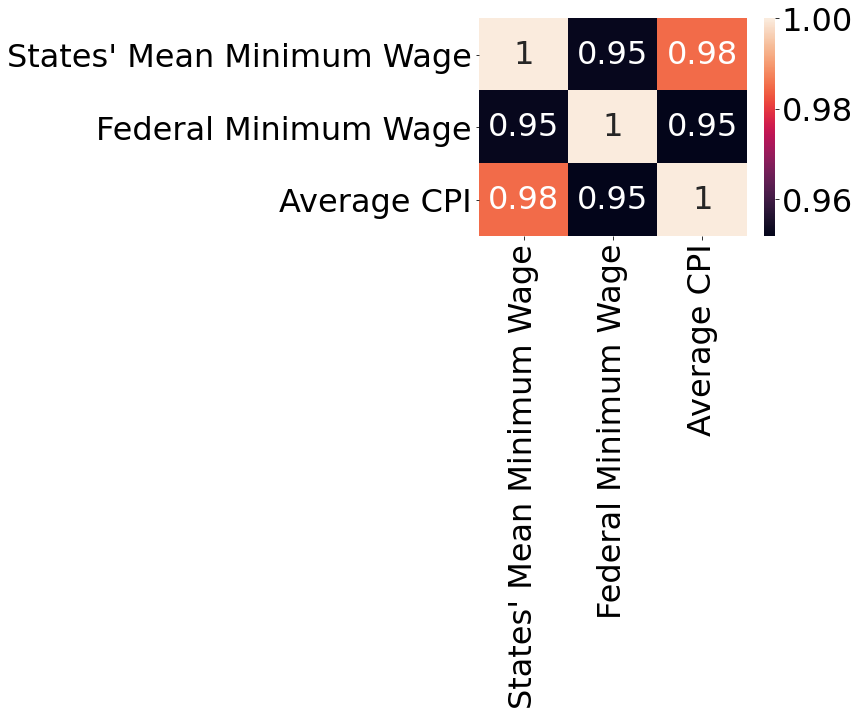

In [17]:
corr = final_minWage.corr()
sn.heatmap(corr, annot=True)
plt.show()

#### Above Chart
It can be seen above that there is high correlation between all variables (State's Mean Minimum Wage, Federal Minimum Wage, and Average CPI)

This shows that, although not a perfect relationship, these 3 variable increase at similar rates over a given time frame

### Summarized Line Charts
These charts will allow you to further see the positive relationships between the variables

Using final_minWage data

In [18]:
# the below code graphs all variable
# I found it to be more affective to separate into 2 graphs

#fig, ax = plt.subplots(figsize = (16, 8))
#final_minWage.plot.line(ax = ax,
                    #legend = True)

#ax.set_yscale("log")

Text(0.5, 1.0, 'State vs. Federal Minimum Wage')

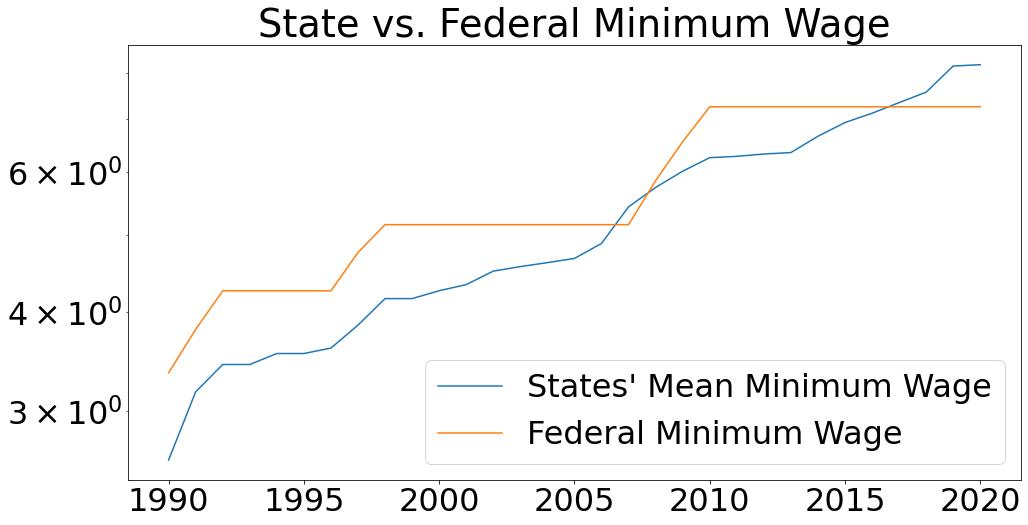

In [20]:
fig, ax = plt.subplots(figsize = (16, 8))
state_fed_summ.plot.line(ax = ax,
                    legend = True)

ax.set_yscale("log")
y_vals = ax.get_yticks()
ax.set_yticks([])

plt.title("State vs. Federal Minimum Wage")

<ipython-input-21-0c70edb1128b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


Text(0.5, 1.0, 'Federal Minimum Wage vs. Average CPI')

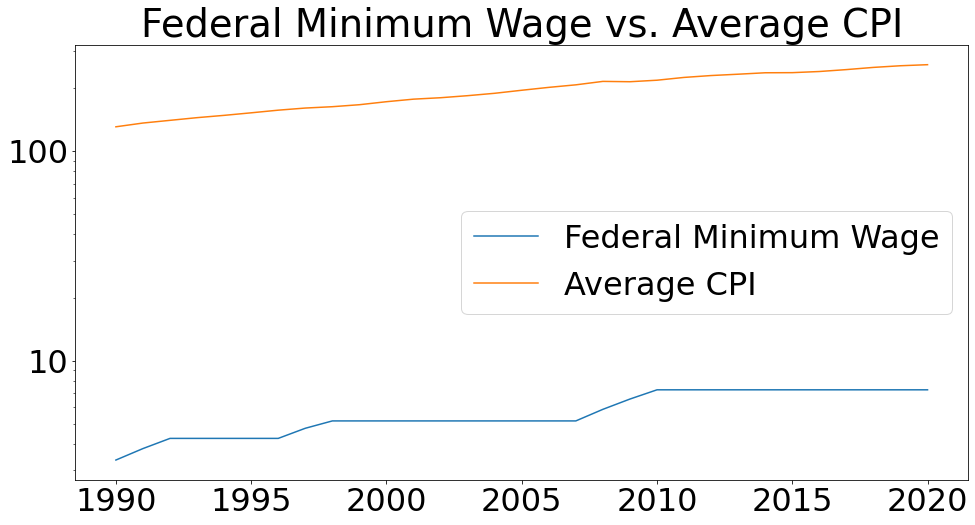

In [21]:
fig, ax = plt.subplots(figsize = (16, 8))
fed_cpi_summ.plot.line(ax = ax,
                    legend = True)

ax.set_yscale("log")
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals]) 

plt.title("Federal Minimum Wage vs. Average CPI")

#### Above Charts
The above charts form a stronger visualization of the correlation between the different factors. You can clearly see that as one increases, so does the other. However, you can also see where the strength of the correlation is not as strong:

Federal Minimum Wage increases with the States' Minimum Wage, but there appears to be a trend that federal minimum wage will remain constant until the State average exceeds the minimum. It could potentially be hypothesised that states have a larger control over the federal minimum wage than one may think.

Federal Minimum Wage and the Average CPI appear to increase at very similar rates. Further research would have to be done to further support this hypothesis.

### Histogram
Using minWage data

In [22]:
minWage

State Minimum Wage  Federal Minimum Wage  \
Year State                                                     
1990 Alabama                      0.00                  3.35   
     Alaska                       3.85                  3.35   
     Arizona                      0.00                  3.35   
     Arkansas                     3.25                  3.35   
     California                   3.35                  3.35   
...                                ...                   ...   
2020 Virginia                     7.25                  7.25   
     Washington                  13.50                  7.25   
     West Virginia                8.75                  7.25   
     Wisconsin                    7.25                  7.25   
     Wyoming                      5.15                  7.25   

                    Effective Minimum Wage  CPI Average  
Year State                                               
1990 Alabama                          3.35       130.70  
     Alaska                           3.85       130.70  
     Arizona                          3.35       130.70  
     Arkansas                         3.35       130.70  
     California                       3.35       130.70  
...                                    ...          ...  
2020 Virginia                         7.25       258.66  
     Washington                      13.50       258.66  
     West Virginia                    8.75       258.66  
     Wisconsin                        7.25       258.66  
     Wyoming                          7.25       258.66  

[1674 rows x 4 columns]

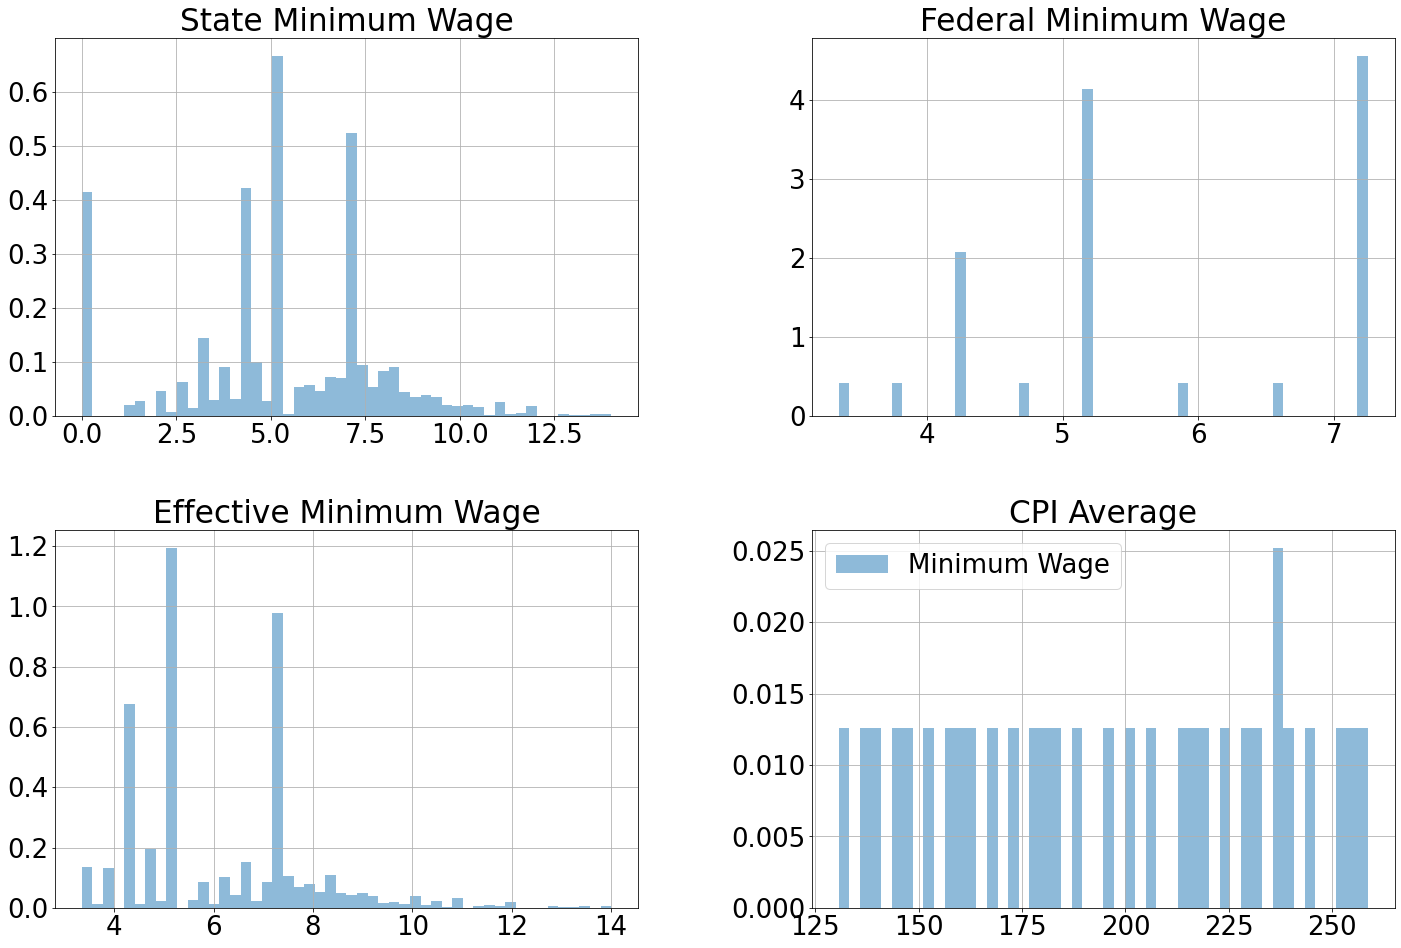

In [28]:
plt.rcParams.update({"font.size": 26})
fig, ax = plt.subplots(2, 2, figsize = (24, 16))
minWage.hist(bins = 50,
             alpha = 0.5,
             label = "Minimum Wage",
             ax = ax,
             density = True
            )

plt.legend()
plt.show()

#### Above Charts
The above charts further show the frequency associated with the respective variables.

State Minimum Wage & Federal Minimum Wage: You can see the frequency of certain wages, which can make certain trends clear. For example, in Federal, the most commone wages appear around 4, 5, and 7 dollars, but as the wage increased, so did the frequency. Thus, you could assume that if the minimum wage increased to 9, it would remain the minimum wage for more years than the US has seen $7.25.

Effective Minnimum Wage: The effective minimum wage has a higher frequency for for federal and state minimum wages that are most frequent. Thus, maybe there is logistical reasons the wage remains what it does. However, further research will need to be done to compare these wages to cost of living within their respective time. You can also observe that the effective minimum wage is seeing occurences from 8-14 dollars. Thus, despite their frequency, the effective minimum wage may be sparking a much needed increase.

CPI Average: Frequency is very consistent, expect at 230. Will have to look further into this.

## Conclusion
> Through the cleaning of my data, as well as visualization, I have been able to determine important variables and observe trends. Further research will need to be conducted prior to formulating a strong stance. I will likely complete regression on this topic to be able to use this data to predict a reasonable wage (currently the data is suggesting an increase, however, I would like to determine if this increase will negatively impact the economy, and to what degree).

#### Word Count

In [29]:
import io
import os
from nbformat import current

total_markdown = 0
total_heading = 0
total_code = 0

for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".ipynb") and not file.endswith("checkpoint.ipynb") :
            #print(os.path.join(root, file))
            with io.open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                nb = current.read(f, 'json')

            word_count_markdown = 0
            word_count_heading = 0
            word_count_code = 0
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == "markdown":
                    word_count_markdown += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "heading":
                    word_count_heading += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "code":
                    word_count_code += len(cell['input'].replace('#', '').lstrip().split(' '))
            total_markdown += word_count_markdown
            total_heading += word_count_heading
            total_code += word_count_code

print("{} Words in notebooks' markdown" .format(total_markdown))
print("{} Words in notebooks' heading" .format(total_heading))
print("{} Words in notebooks' code" .format(total_code))

883 Words in notebooks' markdown
7 Words in notebooks' heading
4016 Words in notebooks' code
